# Práctica 6
@Author: Borja Gete & Fernán Ramos @Versión 1.0.0 @Date 04/05/2016

In [38]:
import networkx as nx # librería de análisis de redes
import numpy as np # librería de computación numérica
import matplotlib.pyplot as plt
import scipy.stats as sc
import math as math
#import plotly.plotly as py # Libreria para histogramas
%matplotlib inline

In [39]:
def crearLista(N):
    nodos=[]
    for n in range(0,N):
        nodos.append(n)
    return nodos

In [48]:
#función Gilbert O'Sullivan
def gilbert(N,p):
    red = nx.Graph()
    [nodos,nodos2]=crearLista(N),crearLista(N)
    red.add_nodes_from(nodos)
    for origen in nodos:
        nodos2.remove(origen)
        for destino in nodos2:
            if np.random.rand(1) < p:
                red.add_edge(origen,destino)
    return red

In [49]:
#Funcion para obtener el componente Gigante de una red/grafo
def obtenerGigante(red):
    return max([Gc.number_of_nodes() for Gc in nx.connected_component_subgraphs(red)])

In [120]:
def calcularVariacion(numero,N,rep):
    #Definimos conjunto de valores
    Kjs=np.linspace(0,np.log(N),numero)
    Ng=[]
    #limite=0
    Ng.append(0.0)
    for kj in Kjs:
        #limite+=1
        sumNg=0
        for i in range(1,rep):
            #generamos la red y calculamos el tamaño del componente gigante
            sumNg += obtenerGigante(gilbert(N,kj/N))
        sumNg=sumNg/rep
        Ng.append(float(sumNg)/N) #Añadimos la media de Ng
    print "NG",Ng
    #representar graficamente
    plt.plot(Ng,color="blue")
    plt.axis([0,numero,0,1])
    plt.show()

## 1 Modelo Gilbert
### 1.1 Implementar en una función de python el algoritmo de generación de redes aleatorias de Gilbert G(N,p) : “red de n nodos donde la probabilidad de que dos nodos cualesquiera tengan un vínculo es p”.
### 1.2 Para una red generada mediante el modelo anterior G(100,0.005) calcular los estadísticos:
#### -> Número de nodos, número de enlaces

In [79]:
red=gilbert(100,0.005)
print "Número de Nodos:", len(red.nodes())
print "Número de Enlaces:", len(red.edges())

Número de Nodos: 100
Número de Enlaces: 21


#### -> Grado máximo, mínimo y medio

In [52]:
print "Grado medio:",np.mean(red.degree().values())
print "Grado máximo:",np.max(red.degree().values())
print "Grado mínimo:",np.min(red.degree().values())

Grado medio: 0.66
Grado máximo: 3
Grado mínimo: 0


#### -> Clustering medio de los nodos

In [53]:
print "Clustering: %.9f" % nx.average_clustering(red)  

Clustering: 0.000000000


## 2 Distribución de grado
### 2.1 Represente la distribución de grado de distintas realizaciones del modelo G(100,p) para los siguientes valores de p={0.005,0.05,0.5}. ¿Qué distribución de probabilidad sigue la distribución de grado?

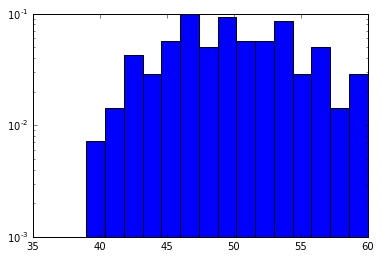

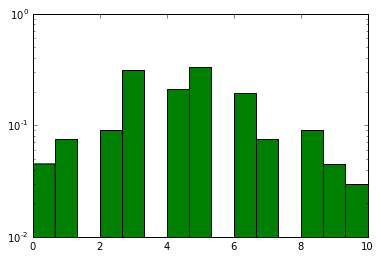

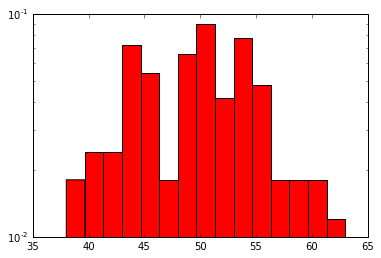

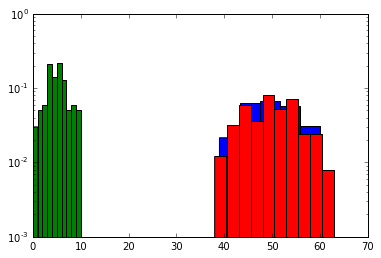

La distribución de probabilidad que sigue es binomial


In [54]:
[a,b,c]= gilbert(100,000.5),gilbert(100,0.05),gilbert(100,0.5)
plt.hist(nx.degree(c).values(),bins=15,log=True,normed=True,color="blue")
plt.show()
plt.hist(nx.degree(b).values(),bins=15,log=True,normed=True,color="green")
plt.show()
plt.hist(nx.degree(a).values(),bins=15,log=True,normed=True,color="red",)
plt.show()
plt.hist(nx.degree(c).values(),bins=5,log=True,normed=True,color="blue")
plt.hist(nx.degree(b).values(),bins=10,log=True,normed=True,color="green")
plt.hist(nx.degree(a).values(),bins=10,log=True,normed=True,color="red",)
plt.show()
print "La distribución de probabilidad que sigue es binomial"

## 3 Aparición del componente gigante
### 3.1 Calcule la variación de N G /N (tamaño del componente mayor N G dividido por el número de nodos N) cuando variamos el grado medio  k de una red G( 1000 ,p) y represéntelo gráficamente de forma semejante a la figura

NG [0.0, 0.0, 0.256, 0.664, 0.752, 0.796, 0.796]


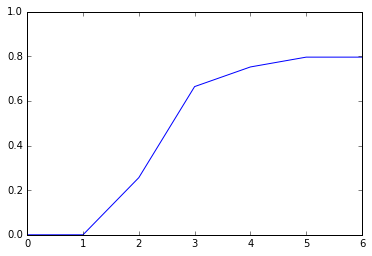

In [123]:
calcularVariacion(6,250,5)